In [1]:
%load_ext autoreload
%autoreload 2 
#pip install beautifulsoup4
#pip install plotly

In [2]:
import os
import pandas as pd
import gzip
import shutil
import requests
import numpy as np
from datetime import datetime, timedelta

import StormData
import Compare

from bs4 import BeautifulSoup

import Dataloader as DL
import ReAnalysisData as rad
import ensemble_pn

import Lmodel as model1
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [3]:
YEARS = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 
         '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
INIT_DATA = False
_decks = ['a', 'b']

'''
StormData.fetch_storm_data(_decks, INIT_DATA)
for year in YEARS:
    StormData.create_year_picklefile(year)
'''

'\nStormData.fetch_storm_data(_decks, INIT_DATA)\nfor year in YEARS:\n    StormData.create_year_picklefile(year)\n'

In [4]:
'''
#load_from_pickle set to False if load from dat files in the data directory

df_master = StormData.get_storm_data_from_datafile(YEARS, load_from_pickle=True)
df_master.to_pickle("df_master.pkl")

df_master = pd.read_pickle("df_master.pkl")

df_ens, df_mean, df_best = DL.generate_ensemble_forecasts(df_master)

df_ens.to_pickle("df_ens.pkl")
df_mean.to_pickle("df_mean.pkl")
df_best.to_pickle("df_best.pkl")

df_master_X = ensemble_pn.generate_X_train_data(df_ens, df_mean, df_best)

df_master_X.to_pickle("df_master_X.pkl")


RAD_PICKLE_FILE = "data/rad_pt2.pkl" 
LOAD_FROM_PICKLE = False
_dfm_diff = rad.generate_reanalysis_Cyclones_differential(_df1[2500:], 
                                            RAD_PICKLE_FILE, LOAD_FROM_PICKLE)
      
_dfm_diff

radpt1 = pd.read_pickle("data/rad_pt1.pkl")
radpt2 = pd.read_pickle("data/rad_pt2.pkl")
_dfm_diff = pd.concat([radpt1, radpt2])
_dfm_diff.to_pickle("_dfm_diff.pkl")
'''

'\n#load_from_pickle set to False if load from dat files in the data directory\n\ndf_master = StormData.get_storm_data_from_datafile(YEARS, load_from_pickle=True)\ndf_master.to_pickle("df_master.pkl")\n\ndf_master = pd.read_pickle("df_master.pkl")\n\ndf_ens, df_mean, df_best = DL.generate_ensemble_forecasts(df_master)\n\ndf_ens.to_pickle("df_ens.pkl")\ndf_mean.to_pickle("df_mean.pkl")\ndf_best.to_pickle("df_best.pkl")\n\ndf_master_X = ensemble_pn.generate_X_train_data(df_ens, df_mean, df_best)\n\ndf_master_X.to_pickle("df_master_X.pkl")\n\n\nRAD_PICKLE_FILE = "data/rad_pt2.pkl" \nLOAD_FROM_PICKLE = False\n_dfm_diff = rad.generate_reanalysis_Cyclones_differential(_df1[2500:], \n                                            RAD_PICKLE_FILE, LOAD_FROM_PICKLE)\n      \n_dfm_diff\n\nradpt1 = pd.read_pickle("data/rad_pt1.pkl")\nradpt2 = pd.read_pickle("data/rad_pt2.pkl")\n_dfm_diff = pd.concat([radpt1, radpt2])\n_dfm_diff.to_pickle("_dfm_diff.pkl")\n'

In [5]:
df_master_X = pd.read_pickle("df_master_X.pkl")
#_dfm_diff = pd.read_pickle("_dfm_diff.pkl")

In [6]:
NUM_OF_INTERVALS = 21
master = df_master_X.dropna()

In [7]:
master

AC00lat00  AC00lat06  AC00lat12  AC00lat18  \
date                basin CY                                               
2008-07-03 12:00:00 AL    02       12.3       12.8       12.9       13.3   
2008-07-03 18:00:00 AL    02       12.7       13.0       13.4       14.0   
2008-07-04 00:00:00 AL    02       13.1       13.8       14.1       14.6   
2008-07-08 06:00:00 AL    02       20.0       20.3       20.8       21.4   
2008-07-08 12:00:00 AL    02       20.7       21.0       21.6       21.8   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       20.2       20.9       21.3       22.0   
2023-10-23 12:00:00 AL    20       20.9       21.4       21.7       22.2   
2023-10-23 18:00:00 AL    20       21.5       21.9       22.3       22.5   
2023-10-24 00:00:00 AL    20       22.1       22.5       22.7       22.9   
2023-10-24 06:00:00 AL    20       22.6       23.0       23.4       23.9   

                              AC00lat24  AC00lat30  AC00lat36  AC00lat42  \
date                basin CY                                               
2008-07-03 12:00:00 AL    02       13.9       14.2       15.0       15.3   
2008-07-03 18:00:00 AL    02       14.0       14.9       15.2       15.6   
2008-07-04 00:00:00 AL    02       15.1       15.7       16.0       16.4   
2008-07-08 06:00:00 AL    02       21.8       22.2       22.7       23.0   
2008-07-08 12:00:00 AL    02       22.5       23.0       23.2       24.0   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       22.7       22.9       23.3       23.9   
2023-10-23 12:00:00 AL    20       22.6       23.1       23.5       24.1   
2023-10-23 18:00:00 AL    20       22.8       23.4       24.2       24.9   
2023-10-24 00:00:00 AL    20       23.7       24.1       24.6       25.6   
2023-10-24 06:00:00 AL    20       24.4       24.9       25.6       26.8   

                              AC00lat48  AC00lat54  AC00lat60  AC00lat66  \
date                basin CY                                               
2008-07-03 12:00:00 AL    02       15.7       16.3       16.9       17.5   
2008-07-03 18:00:00 AL    02       16.0       16.2       16.8       16.9   
2008-07-04 00:00:00 AL    02       16.8       16.9       17.2       17.7   
2008-07-08 06:00:00 AL    02       23.5       24.5       24.2       24.2   
2008-07-08 12:00:00 AL    02       24.1       25.2       25.8       26.2   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       24.5       25.1       26.1       27.2   
2023-10-23 12:00:00 AL    20       24.7       25.4       26.3       27.4   
2023-10-23 18:00:00 AL    20       25.8       27.2       27.5       28.3   
2023-10-24 00:00:00 AL    20       26.7       27.6       28.5       29.2   
2023-10-24 06:00:00 AL    20       27.5       28.2       28.5       29.0   

                              AC00lat72  AC00lat78  AC00lat84  AC00lat90  \
date                basin CY                                               
2008-07-03 12:00:00 AL    02       17.7       18.0       18.8       19.1   
2008-07-03 18:00:00 AL    02       17.8       17.8       18.3       18.9   
2008-07-04 00:00:00 AL    02       18.2       18.7       19.0       19.8   
2008-07-08 06:00:00 AL    02       24.2       24.2       24.2       24.2   
2008-07-08 12:00:00 AL    02       26.2       26.9       28.1       28.2   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       27.8       28.6       29.4       29.6   
2023-10-23 12:00:00 AL    20       28.1       28.8       29.5       29.8   
2023-10-23 18:00:00 AL    20       29.1       29.5       29.7       29.9   
2023-10-24 00:00:00 AL    20       30.2       30.9       31.2       31.7   
2023-10-24 06:00:00 AL    20       29.1       29.2       29.5       29.9   

                              AC00lat96  AC00lat102  AC00lat108  AC00lat11

In [8]:
# total number of storms
master.groupby([master.index.get_level_values('date').year, 'CY']).apply(lambda group: group.index.tolist())

date  CY
2008  02    [(2008-07-03 12:00:00, AL, 02), (2008-07-03 18...
      06    [(2008-08-18 18:00:00, AL, 06), (2008-08-19 00...
      07    [(2008-08-29 00:00:00, AL, 07), (2008-08-29 06...
      08    [(2008-08-29 00:00:00, AL, 08), (2008-08-29 06...
      09    [(2008-09-04 18:00:00, AL, 09), (2008-09-05 06...
                                  ...                        
2023  15    [(2023-09-10 06:00:00, AL, 15), (2023-09-10 12...
      17    [(2023-09-22 00:00:00, AL, 17), (2023-09-22 06...
      18    [(2023-09-24 18:00:00, AL, 18), (2023-09-25 00...
      19    [(2023-10-08 12:00:00, AL, 19), (2023-10-08 18...
      20    [(2023-10-12 00:00:00, AL, 20), (2023-10-12 06...
Length: 155, dtype: object

In [9]:
df = master
df = df.sort_index()

train = df[df.index.get_level_values('date').year < 2023]
test = df[df.index.get_level_values('date').year >= 2023]

In [10]:
test

AC00lat00  AC00lat06  AC00lat12  AC00lat18  \
date                basin CY                                               
2023-06-17 06:00:00 AL    03        9.9       10.2        9.6        8.8   
2023-06-17 12:00:00 AL    03        9.4        9.4        9.0        9.9   
2023-06-17 18:00:00 AL    03       10.1        9.4        9.8       10.6   
2023-06-18 00:00:00 AL    03        9.2       10.0       10.4       10.8   
2023-06-18 06:00:00 AL    03        9.8       10.1       10.5       10.9   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       20.2       20.9       21.3       22.0   
2023-10-23 12:00:00 AL    20       20.9       21.4       21.7       22.2   
2023-10-23 18:00:00 AL    20       21.5       21.9       22.3       22.5   
2023-10-24 00:00:00 AL    20       22.1       22.5       22.7       22.9   
2023-10-24 06:00:00 AL    20       22.6       23.0       23.4       23.9   

                              AC00lat24  AC00lat30  AC00lat36  AC00lat42  \
date                basin CY                                               
2023-06-17 06:00:00 AL    03        9.6       10.5       10.7       10.7   
2023-06-17 12:00:00 AL    03        9.9       10.5       10.8       10.8   
2023-06-17 18:00:00 AL    03       10.9       11.1       11.3       11.3   
2023-06-18 00:00:00 AL    03       11.1       11.2       11.3       11.4   
2023-06-18 06:00:00 AL    03       11.0       11.0       11.0       11.1   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       22.7       22.9       23.3       23.9   
2023-10-23 12:00:00 AL    20       22.6       23.1       23.5       24.1   
2023-10-23 18:00:00 AL    20       22.8       23.4       24.2       24.9   
2023-10-24 00:00:00 AL    20       23.7       24.1       24.6       25.6   
2023-10-24 06:00:00 AL    20       24.4       24.9       25.6       26.8   

                              AC00lat48  AC00lat54  AC00lat60  AC00lat66  \
date                basin CY                                               
2023-06-17 06:00:00 AL    03       11.0       10.9       11.0       10.9   
2023-06-17 12:00:00 AL    03       10.9       10.8       10.8       10.9   
2023-06-17 18:00:00 AL    03       11.2       11.4       11.6       11.6   
2023-06-18 00:00:00 AL    03       11.6       11.7       11.7       12.0   
2023-06-18 06:00:00 AL    03       11.2       11.3       11.5       11.7   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       24.5       25.1       26.1       27.2   
2023-10-23 12:00:00 AL    20       24.7       25.4       26.3       27.4   
2023-10-23 18:00:00 AL    20       25.8       27.2       27.5       28.3   
2023-10-24 00:00:00 AL    20       26.7       27.6       28.5       29.2   
2023-10-24 06:00:00 AL    20       27.5       28.2       28.5       29.0   

                              AC00lat72  AC00lat78  AC00lat84  AC00lat90  \
date                basin CY                                               
2023-06-17 06:00:00 AL    03       11.1       11.2       11.5       12.1   
2023-06-17 12:00:00 AL    03       11.0       11.2       11.6       11.6   
2023-06-17 18:00:00 AL    03       11.9       12.1       12.0       11.9   
2023-06-18 00:00:00 AL    03       12.1       12.2       12.4       12.6   
2023-06-18 06:00:00 AL    03       11.8       11.8       12.1       12.3   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       27.8       28.6       29.4       29.6   
2023-10-23 12:00:00 AL    20       28.1       28.8       29.5       29.8   
2023-10-23 18:00:00 AL    20       29.1       29.5       29.7       29.9   
2023-10-24 00:00:00 AL    20       30.2       30.9       31.2       31.7   
2023-10-24 06:00:00 AL    20       29.1       29.2       29.5       29.9   

                              AC00lat96  AC00lat102  AC00lat108  AC00lat11

In [11]:
from joblib import dump, load
X1 = train.iloc[:, :-NUM_OF_INTERVALS*2].to_numpy().astype(np.float64)
y1 = train.iloc[:, -NUM_OF_INTERVALS*2:].to_numpy().astype(np.float64)

'''
mod = model1.kfold_model(X1, y1, num_folds=5, max_epochs = 50, intervals = NUM_OF_INTERVALS)
dump(mod, 'mod_five_0-1_500__3.joblib')
'''

mod = load('mod_five_0-1_500__3.joblib') 

In [12]:
X_test = test.iloc[:, :-NUM_OF_INTERVALS*2].to_numpy().astype(np.float64)
y_test = test.iloc[:, -NUM_OF_INTERVALS*2:].to_numpy().astype(np.float64)

In [13]:
import torch.nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#mod.to(device)
#mod.eval()
mod.double()  # Set the model to Double data type
X_test = torch.tensor(X_test, dtype=torch.double).unsqueeze(1).to(device)

In [14]:
mod

CNN(
  (fc1): Linear(in_features=924, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=42, bias=True)
  (relu): ReLU()
)

In [15]:
outputs = mod(X_test).detach().numpy()
outputs

array([[ 10.02808889, -28.69216214,  10.28219879, ..., -48.98570765,
         13.72096515, -50.20097493],
       [  9.84028695, -28.17090633,   9.84682576, ..., -53.90146141,
         14.10313373, -55.55606301],
       [ 10.18574331, -30.59904506,  10.33583277, ..., -55.64468884,
         14.53935945, -57.16587409],
       ...,
       [ 20.8015637 , -63.15807129,  21.34828377, ..., -62.29631177,
         29.36999097, -60.26031316],
       [ 21.34461555, -62.38772956,  21.84788451, ..., -62.76775705,
         30.40368838, -61.10086034],
       [ 22.54800257, -61.41493492,  22.89150792, ..., -66.76550713,
         29.77219394, -65.79268774]])

In [16]:
_cols = []
for i in range(0, NUM_OF_INTERVALS):
    lat = 'PREDLAT'+ str(i*6).zfill(2)
    lon = 'PREDLON'+ str(i*6).zfill(2)
    _cols.append(lat)
    _cols.append(lon)

In [17]:
df_output = pd.DataFrame(data = outputs, columns = _cols)
test_reset = test.reset_index()
df_output_reset = df_output.reset_index()

# Concatenate DataFrames along columns axis
full_matrix = pd.concat([test_reset, df_output_reset], axis=1)
full_matrix.set_index(['date', 'basin', 'CY'], inplace=True)
full_matrix.drop(['index'], axis=1, inplace=True)

In [18]:
full_matrix

AC00lat00  AC00lat06  AC00lat12  AC00lat18  \
date                basin CY                                               
2023-06-17 06:00:00 AL    03        9.9       10.2        9.6        8.8   
2023-06-17 12:00:00 AL    03        9.4        9.4        9.0        9.9   
2023-06-17 18:00:00 AL    03       10.1        9.4        9.8       10.6   
2023-06-18 00:00:00 AL    03        9.2       10.0       10.4       10.8   
2023-06-18 06:00:00 AL    03        9.8       10.1       10.5       10.9   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       20.2       20.9       21.3       22.0   
2023-10-23 12:00:00 AL    20       20.9       21.4       21.7       22.2   
2023-10-23 18:00:00 AL    20       21.5       21.9       22.3       22.5   
2023-10-24 00:00:00 AL    20       22.1       22.5       22.7       22.9   
2023-10-24 06:00:00 AL    20       22.6       23.0       23.4       23.9   

                              AC00lat24  AC00lat30  AC00lat36  AC00lat42  \
date                basin CY                                               
2023-06-17 06:00:00 AL    03        9.6       10.5       10.7       10.7   
2023-06-17 12:00:00 AL    03        9.9       10.5       10.8       10.8   
2023-06-17 18:00:00 AL    03       10.9       11.1       11.3       11.3   
2023-06-18 00:00:00 AL    03       11.1       11.2       11.3       11.4   
2023-06-18 06:00:00 AL    03       11.0       11.0       11.0       11.1   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       22.7       22.9       23.3       23.9   
2023-10-23 12:00:00 AL    20       22.6       23.1       23.5       24.1   
2023-10-23 18:00:00 AL    20       22.8       23.4       24.2       24.9   
2023-10-24 00:00:00 AL    20       23.7       24.1       24.6       25.6   
2023-10-24 06:00:00 AL    20       24.4       24.9       25.6       26.8   

                              AC00lat48  AC00lat54  AC00lat60  AC00lat66  \
date                basin CY                                               
2023-06-17 06:00:00 AL    03       11.0       10.9       11.0       10.9   
2023-06-17 12:00:00 AL    03       10.9       10.8       10.8       10.9   
2023-06-17 18:00:00 AL    03       11.2       11.4       11.6       11.6   
2023-06-18 00:00:00 AL    03       11.6       11.7       11.7       12.0   
2023-06-18 06:00:00 AL    03       11.2       11.3       11.5       11.7   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       24.5       25.1       26.1       27.2   
2023-10-23 12:00:00 AL    20       24.7       25.4       26.3       27.4   
2023-10-23 18:00:00 AL    20       25.8       27.2       27.5       28.3   
2023-10-24 00:00:00 AL    20       26.7       27.6       28.5       29.2   
2023-10-24 06:00:00 AL    20       27.5       28.2       28.5       29.0   

                              AC00lat72  AC00lat78  AC00lat84  AC00lat90  \
date                basin CY                                               
2023-06-17 06:00:00 AL    03       11.1       11.2       11.5       12.1   
2023-06-17 12:00:00 AL    03       11.0       11.2       11.6       11.6   
2023-06-17 18:00:00 AL    03       11.9       12.1       12.0       11.9   
2023-06-18 00:00:00 AL    03       12.1       12.2       12.4       12.6   
2023-06-18 06:00:00 AL    03       11.8       11.8       12.1       12.3   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       27.8       28.6       29.4       29.6   
2023-10-23 12:00:00 AL    20       28.1       28.8       29.5       29.8   
2023-10-23 18:00:00 AL    20       29.1       29.5       29.7       29.9   
2023-10-24 00:00:00 AL    20       30.2       30.9       31.2       31.7   
2023-10-24 06:00:00 AL    20       29.1       29.2       29.5       29.9   

                              AC00lat96  AC00lat102  AC00lat108  AC00lat11

In [19]:
from geopy.distance import geodesic
from haversine import haversine, Unit
import math

count = []
mod_dists = []
ens_dists = []
for i in range (0, NUM_OF_INTERVALS):
    tau = str(i*6).zfill(2)
    best = ['BESTLAT' + tau, 'BESTLON' + tau]
    mean = ['AEMNlat' + tau, 'AEMNlon' + tau]
    pred = ['PREDLAT' + tau, 'PREDLON' + tau]
    
    best_coords = full_matrix[best].to_records(index=False)
    mean_coords = full_matrix[mean].to_records(index=False)
    pred_coords = full_matrix[pred].to_records(index=False)
    
    distances = []
    mod_dist = []
    ens_dist = []
    for j in range(len(best_coords)):
        ens_mean_dist = haversine(best_coords[j], mean_coords[j], unit=Unit.KILOMETERS)
        model_dist = haversine(best_coords[j], pred_coords[j], unit=Unit.KILOMETERS)
        
        mod_dist.append(model_dist)
        ens_dist.append(ens_mean_dist)
        
        if (ens_mean_dist > model_dist):
            distances.append(1)
        else:
            distances.append(-1)
            
    count.append(distances)
    mod_dists.append(mod_dist)
    ens_dists.append(ens_dist)

In [20]:
np.mean(mod_dists)

250.64687041707725

In [21]:
np.mean(ens_dists)

255.78163199008438

In [22]:
[np.mean(mod_dists) - np.mean(ens_dists)] / np.mean(ens_dists)

array([-0.02007479])

In [23]:
df_mod_dists = pd.DataFrame(data = mod_dists).T
df_mod_dists.columns = df_mod_dists.columns.astype(int) * 6

df_ens_dists = pd.DataFrame(data = ens_dists).T
df_ens_dists.columns = df_ens_dists.columns.astype(int) * 6

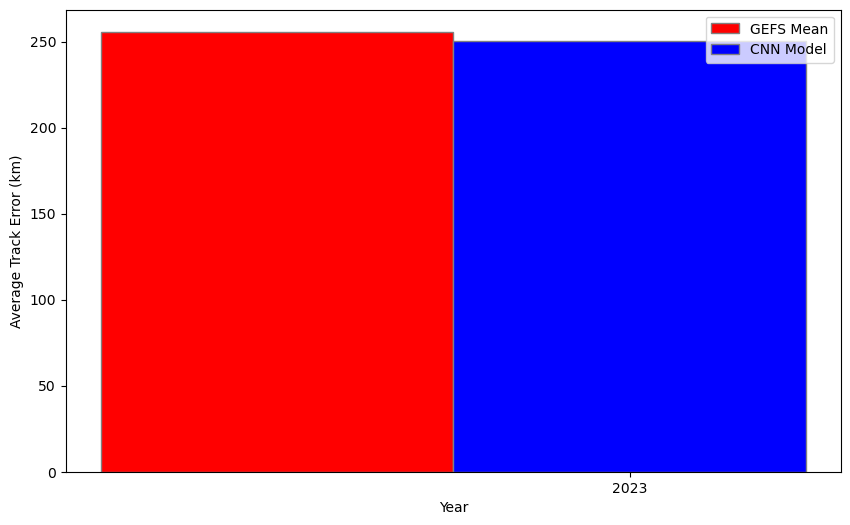

In [24]:
df_mod_dists.set_index(full_matrix.index, inplace=True)
df_mod_avg_year = pd.DataFrame(df_mod_dists.groupby(df_mod_dists.index.get_level_values('date').year).mean().mean(axis=1)
                              ).rename(index = {"date": "Year"}, columns = {0: "CNN Average Track Error"})

df_ens_dists.set_index(full_matrix.index, inplace=True)
df_ens_avg_year = pd.DataFrame(df_ens_dists.groupby(df_ens_dists.index.get_level_values('date').year).mean().mean(axis=1)
                              ).rename(index = {"date": "Year"}, columns = {0: "GEFS Mean Average Track Error"})

merged_df = df_mod_avg_year.join(df_ens_avg_year)

# Plotting
plt.figure(figsize=(10, 6))

# Set position of bar on X axis
bar_width = 0.35
r1 = range(len(merged_df))

# Make the plot
plt.bar(r1, merged_df['GEFS Mean Average Track Error'], color='r', width=bar_width, edgecolor='grey', label='GEFS Mean')
plt.bar([x + bar_width for x in r1], merged_df['CNN Average Track Error'], color='b', width=bar_width, edgecolor='grey', label='CNN Model')

# Adding labels
plt.xlabel('Year')
plt.ylabel('Average Track Error (km)')
plt.xticks([r + bar_width for r in range(len(merged_df))], merged_df.index)

# Adding legend
plt.legend()

# Show plot
plt.show()

In [25]:
# precent of 5-day forecasts improved
df_mod_sum = df_mod_dists.mean(axis=1)
df_ens_sum = df_ens_dists.mean(axis=1)
(df_mod_sum < df_ens_sum).sum() / len(df_mod_sum < df_ens_sum)

0.5119047619047619

In [26]:
statistics = pd.DataFrame()

statistics['mod_mse'] = (df_mod_dists**2).sum(axis=0)/len(df_mod_dists)
statistics['ens_mse'] = (df_ens_dists**2).sum(axis=0)/len(df_ens_dists)

statistics['mod_rmse'] = statistics['mod_mse'] ** 0.5
statistics['ens_rmse'] = statistics['ens_mse'] ** 0.5

statistics['mod_mae'] = df_mod_dists.sum(axis=0)/len(df_mod_dists)
statistics['ens_mae'] = df_ens_dists.sum(axis=0)/len(df_ens_dists)

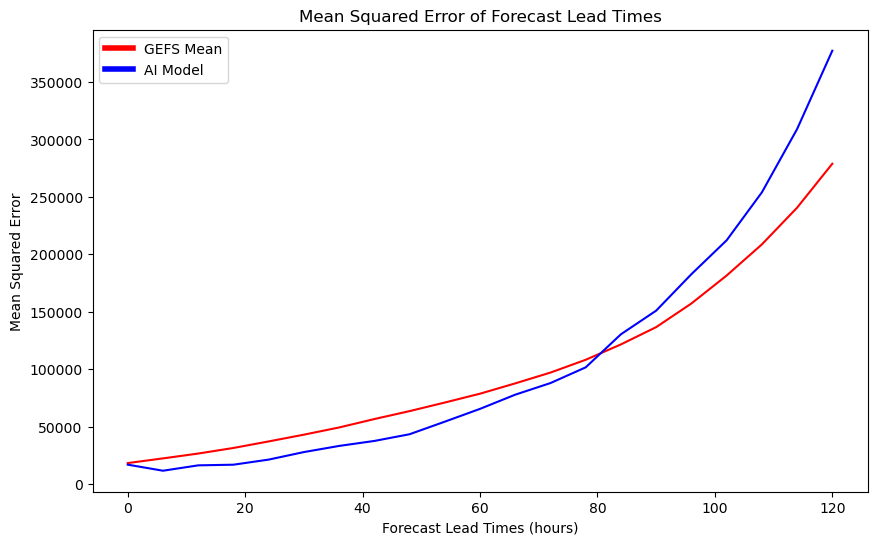

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to have a single 'Value' column for seaborn
df_melted = pd.melt(statistics.reset_index(), id_vars=['index'], value_vars=['ens_mse', 'mod_mse'], var_name='Column', value_name='Value')

# Define custom colors for the bars
custom_colors = {'ens_mse': 'red', 'mod_mse': 'blue'}

# Plotting the double bar graph using seaborn with custom colors
plt.figure(figsize=(10, 6))
sns.lineplot(x='index', y='Value', hue='Column', data=df_melted, palette=custom_colors)

# Adding labels, title, and legend
plt.xlabel('Forecast Lead Times (hours)')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Forecast Lead Times')

# Provide legend labels and handles directly
legend_labels = ['GEFS Mean', 'AI Model']
legend_handles = [plt.Line2D([0], [0], color=custom_colors[key], lw=4) for key in custom_colors]
plt.legend(legend_handles, legend_labels)

# Show the plot
plt.show()

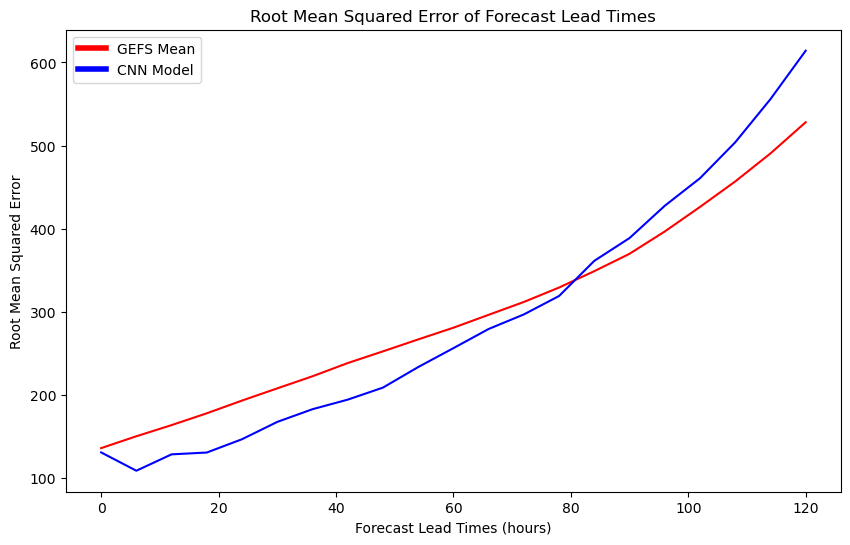

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'statistics' is your DataFrame

# Melt the DataFrame to have a single 'Value' column for seaborn
df_melted = pd.melt(statistics.reset_index(), id_vars=['index'], value_vars=['ens_rmse', 'mod_rmse'], var_name='Column', value_name='Value')

# Define custom colors for the bars
custom_colors = {'ens_rmse': 'red', 'mod_rmse': 'blue'}

# Plotting the double bar graph using seaborn with custom colors
plt.figure(figsize=(10, 6))
sns.lineplot(x='index', y='Value', hue='Column', data=df_melted, palette=custom_colors)

# Adding labels, title, and legend
plt.xlabel('Forecast Lead Times (hours)')
plt.ylabel('Root Mean Squared Error')
plt.title('Root Mean Squared Error of Forecast Lead Times')

# Provide legend labels and handles directly
legend_labels = ['GEFS Mean', 'CNN Model']
legend_handles = [plt.Line2D([0], [0], color=custom_colors[key], lw=4) for key in custom_colors]
plt.legend(legend_handles, legend_labels)

# Show the plot
plt.show()

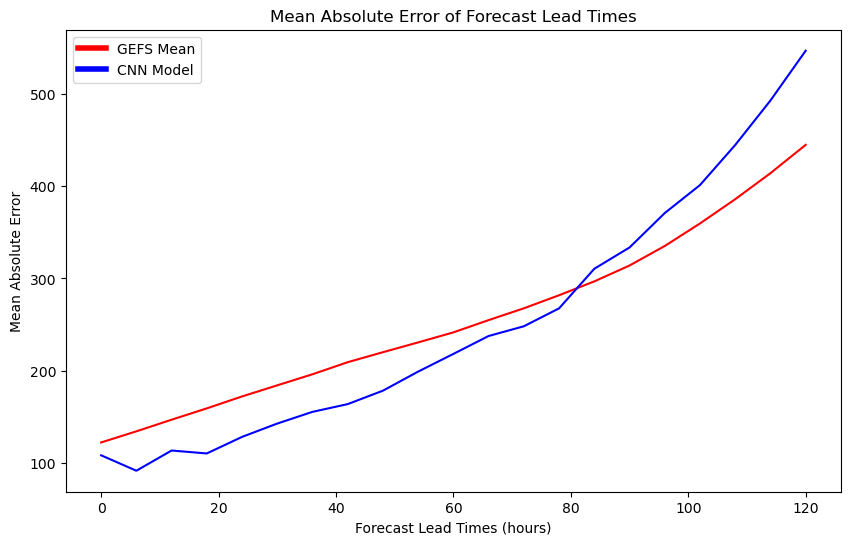

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'statistics' is your DataFrame

# Melt the DataFrame to have a single 'Value' column for seaborn
df_melted = pd.melt(statistics.reset_index(), id_vars=['index'], value_vars=['ens_mae', 'mod_mae'], var_name='Column', value_name='Value')

# Define custom colors for the bars
custom_colors = {'ens_mae': 'red', 'mod_mae': 'blue'}

# Plotting the double bar graph using seaborn with custom colors
plt.figure(figsize=(10, 6))
sns.lineplot(x='index', y='Value', hue='Column', data=df_melted, palette=custom_colors)

# Adding labels, title, and legend
plt.xlabel('Forecast Lead Times (hours)')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error of Forecast Lead Times')

# Provide legend labels and handles directly
legend_labels = ['GEFS Mean', 'CNN Model']
legend_handles = [plt.Line2D([0], [0], color=custom_colors[key], lw=4) for key in custom_colors]
plt.legend(legend_handles, legend_labels)

# Show the plot
plt.show()

In [30]:
df_mod_dists.describe()

,0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90,96,102,108,114,120
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,108.285429,91.555734,113.453531,110.278695,128.230324,142.699385,155.378544,163.778694,178.351903,199.042893,218.218994,237.628475,248.165666,267.601026,310.530772,333.597716,370.920446,401.267840,444.727471,492.943601,546.927138
std,73.252608,58.561687,60.102350,69.953882,71.064349,87.635701,96.204945,104.474998,108.473780,122.053941,134.338469,146.826312,162.944550,173.812172,184.871537,199.718797,212.885898,226.633709,237.265485,257.247010,279.762453
min,5.036588,5.494192,6.251672,3.235950,13.133332,4.395118,9.225036,4.736028,11.363662,5.703822,8.765693,10.330517,8.008390,6.834187,16.954252,3.598822,28.638188,41.810830,37.785732,40.072880,44.643725
25%,58.654120,51.157260,70.476296,60.545520,74.667372,79.571187,83.642154,86.659073,94.916169,106.221282,113.770485,126.525428,115.461187,137.206206,179.142917,199.808492,229.388922,250.754868,291.062407,317.304224,364.527230
50%,91.481490,77.005169,105.446607,100.103131,114.351101,134.776426,140.613347,150.847635,167.608416,184.848888,196.436493,215.115132,228.844864,246.319329,284.310923,297.344895,321.326901,360.773281,389.464519,432.296593,499.097331
75%,139.812226,117.574035,145.424840,138.389648,167.758761,189.396013,200.210995,216.083189,238.161138,270.629562,309.774547,323.027000,332.059594,343.270589,401.309825,427.134626,459.624771,492.223074,549.999815,632.081255,683.042011
max,465.611684,386.900823,385.495179,380.144539,362.171731,493.501285,554.699849,571.649321,598.335805,568.687978,571.301341,694.518979,899.416214,1078.856224,1170.222626,1265.737804,1349.312876,1403.392704,1419.312902,1509.340574,1484.377490


In [31]:
df_mod_dist_std = df_mod_dists - df_mod_dists.describe().loc['std']

In [32]:
df_ens_dists.describe()

,0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90,96,102,108,114,120
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,122.200941,134.258779,146.858736,159.156173,172.094682,184.136743,196.133258,209.230240,220.055481,230.688230,241.566712,254.858741,267.647584,281.805979,296.842192,314.047008,335.213855,359.640713,385.940826,414.157143,444.880254
std,59.414680,67.226217,72.030126,79.290867,87.691884,96.342456,104.831925,114.039130,123.614613,133.960532,143.269630,151.315616,160.086831,170.245066,183.494231,195.424211,212.251107,228.910539,244.695937,263.211857,284.908472
min,9.357186,0.000000,23.394607,0.000000,11.119508,11.119508,10.173901,10.197257,10.317082,0.000000,11.119508,15.052934,0.000000,24.127382,8.653681,20.437487,14.447282,15.223892,11.119508,28.917117,22.239016
25%,79.255249,85.473197,90.454242,102.584297,111.515995,113.177259,116.551512,119.027192,116.131909,122.899159,121.542745,132.895981,134.455182,148.020939,160.439882,170.745268,182.783998,191.186875,206.982722,226.732347,241.551444
50%,111.843001,122.022355,136.585634,145.256987,163.216191,174.055561,186.804815,205.560624,214.251151,227.777485,228.176270,242.324937,249.945142,263.631377,269.190753,274.883539,292.571829,316.092290,332.019816,349.813315,376.152831
75%,158.647299,179.321997,194.788115,214.823080,233.265473,245.646005,267.340673,288.392234,301.622576,317.292027,337.939954,352.717877,360.998684,384.591587,400.155536,426.028378,458.081341,495.847937,525.842431,571.567529,624.809887
max,320.287439,351.486161,412.841082,391.124474,487.675221,568.726266,619.594075,651.177331,688.278783,659.118579,654.564263,668.594944,777.456708,922.009885,977.403801,1025.453315,1049.381449,1070.355270,1127.079620,1204.584521,1296.992418


In [33]:
df_ens_dist_std = df_ens_dists - df_ens_dists.describe().loc['std']

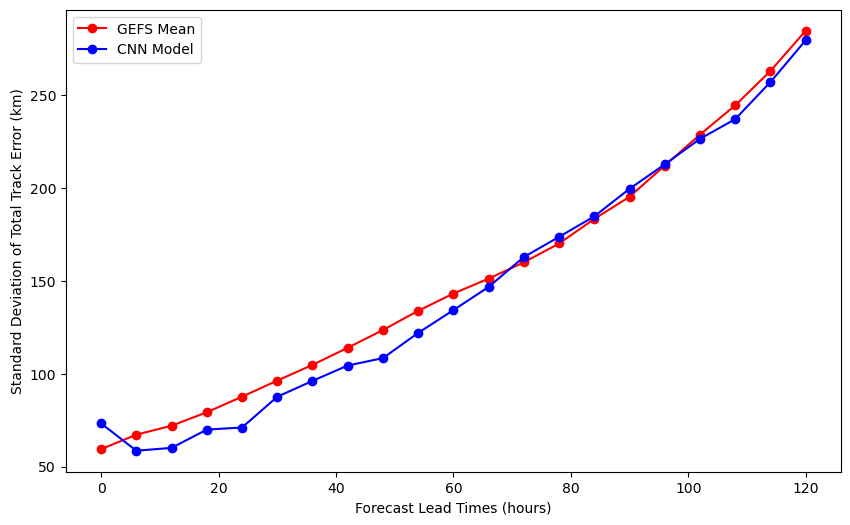

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the lines
plt.plot(df_ens_dists.describe().loc['std'], color='red', label='GEFS Mean', marker='o')
plt.plot(df_mod_dists.describe().loc['std'], color='blue', label='CNN Model', marker='o')

# Add labels and legend
plt.xlabel('Forecast Lead Times (hours)')
plt.ylabel('Standard Deviation of Total Track Error (km)')
plt.legend(loc = 'upper left')

# Show the plot
plt.show()

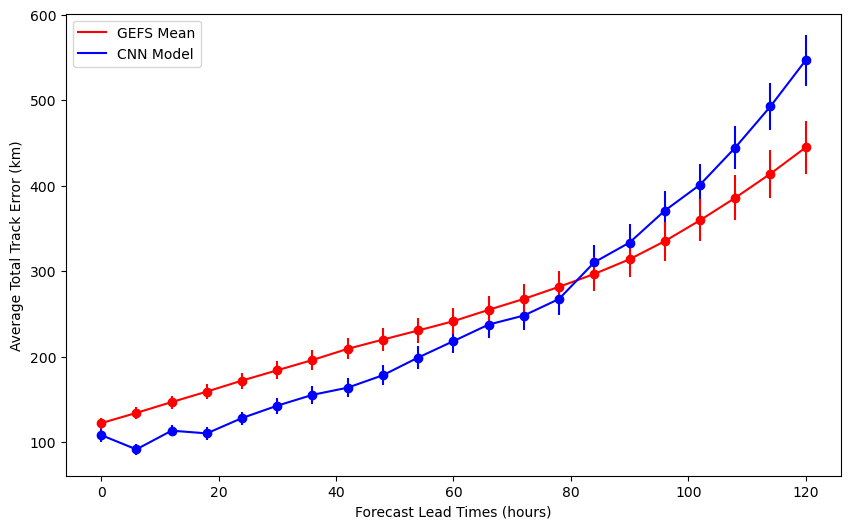

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))

# Calculate means and standard deviations
mean_mod = df_mod_dists.mean()
std_mod = df_mod_dists.std()

mean_ens = df_ens_dists.mean()
std_ens = df_ens_dists.std()

# Calculate 95% confidence interval
conf_int_mod = 1.96 * (std_mod / np.sqrt(len(df_mod_dists)))
conf_int_ens = 1.96 * (std_ens / np.sqrt(len(df_ens_dists)))

# Plot with error bars
plt.errorbar(mean_mod.index, mean_mod, yerr=conf_int_mod, fmt='o', color='blue')
plt.errorbar(mean_ens.index, mean_ens, yerr=conf_int_ens, fmt='o', color='red')

# Plot the lines
plt.plot(df_ens_dists.columns, df_ens_dists.mean(), color='red', label='GEFS Mean')
plt.plot(df_mod_dists.columns, df_mod_dists.mean(), color='blue', label='CNN Model')

# Add labels and legend
plt.xlabel('Forecast Lead Times (hours)')
plt.ylabel('Average Total Track Error (km)')
plt.legend(loc = 'upper left')

# Show the plot
plt.show()

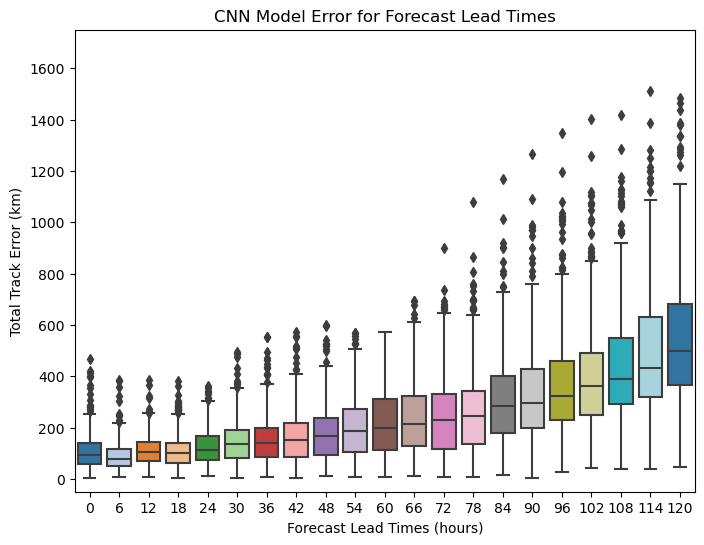

In [36]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# You can customize the appearance of the plot using Seaborn's options
custom_palette = sns.color_palette('tab20', 21)
sns.boxplot(data=df_mod_dists, palette=custom_palette)  # 'palette' controls the color palette

# Set labels and title
plt.xlabel('Forecast Lead Times (hours)')
plt.ylabel('Total Track Error (km)')
plt.title('CNN Model Error for Forecast Lead Times')

plt.ylim(-50, 1750)

# Display the plot
plt.show()

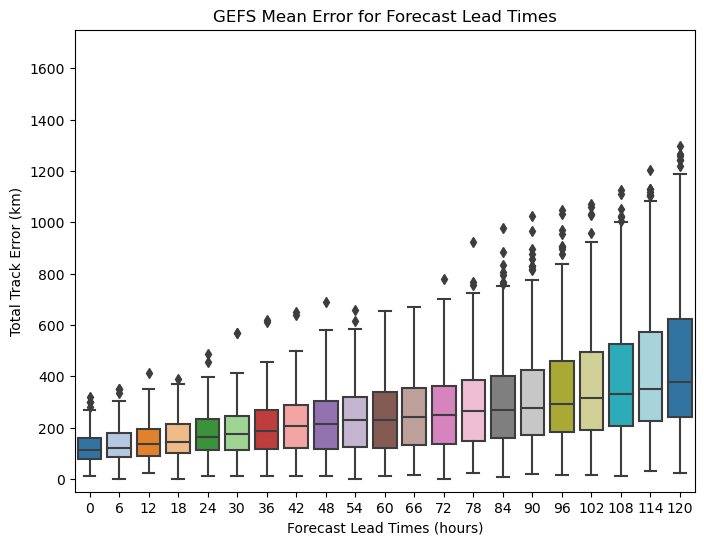

In [37]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# You can customize the appearance of the plot using Seaborn's options
custom_palette = sns.color_palette('tab20', 22)
sns.boxplot(data=df_ens_dists, palette=custom_palette)  # 'palette' controls the color palette

# Set labels and title
plt.xlabel('Forecast Lead Times (hours)')
plt.ylabel('Total Track Error (km)')
plt.title('GEFS Mean Error for Forecast Lead Times')

plt.ylim(-50, 1750)

# Display the plot
plt.show()

In [38]:
full_matrix

AC00lat00  AC00lat06  AC00lat12  AC00lat18  \
date                basin CY                                               
2023-06-17 06:00:00 AL    03        9.9       10.2        9.6        8.8   
2023-06-17 12:00:00 AL    03        9.4        9.4        9.0        9.9   
2023-06-17 18:00:00 AL    03       10.1        9.4        9.8       10.6   
2023-06-18 00:00:00 AL    03        9.2       10.0       10.4       10.8   
2023-06-18 06:00:00 AL    03        9.8       10.1       10.5       10.9   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       20.2       20.9       21.3       22.0   
2023-10-23 12:00:00 AL    20       20.9       21.4       21.7       22.2   
2023-10-23 18:00:00 AL    20       21.5       21.9       22.3       22.5   
2023-10-24 00:00:00 AL    20       22.1       22.5       22.7       22.9   
2023-10-24 06:00:00 AL    20       22.6       23.0       23.4       23.9   

                              AC00lat24  AC00lat30  AC00lat36  AC00lat42  \
date                basin CY                                               
2023-06-17 06:00:00 AL    03        9.6       10.5       10.7       10.7   
2023-06-17 12:00:00 AL    03        9.9       10.5       10.8       10.8   
2023-06-17 18:00:00 AL    03       10.9       11.1       11.3       11.3   
2023-06-18 00:00:00 AL    03       11.1       11.2       11.3       11.4   
2023-06-18 06:00:00 AL    03       11.0       11.0       11.0       11.1   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       22.7       22.9       23.3       23.9   
2023-10-23 12:00:00 AL    20       22.6       23.1       23.5       24.1   
2023-10-23 18:00:00 AL    20       22.8       23.4       24.2       24.9   
2023-10-24 00:00:00 AL    20       23.7       24.1       24.6       25.6   
2023-10-24 06:00:00 AL    20       24.4       24.9       25.6       26.8   

                              AC00lat48  AC00lat54  AC00lat60  AC00lat66  \
date                basin CY                                               
2023-06-17 06:00:00 AL    03       11.0       10.9       11.0       10.9   
2023-06-17 12:00:00 AL    03       10.9       10.8       10.8       10.9   
2023-06-17 18:00:00 AL    03       11.2       11.4       11.6       11.6   
2023-06-18 00:00:00 AL    03       11.6       11.7       11.7       12.0   
2023-06-18 06:00:00 AL    03       11.2       11.3       11.5       11.7   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       24.5       25.1       26.1       27.2   
2023-10-23 12:00:00 AL    20       24.7       25.4       26.3       27.4   
2023-10-23 18:00:00 AL    20       25.8       27.2       27.5       28.3   
2023-10-24 00:00:00 AL    20       26.7       27.6       28.5       29.2   
2023-10-24 06:00:00 AL    20       27.5       28.2       28.5       29.0   

                              AC00lat72  AC00lat78  AC00lat84  AC00lat90  \
date                basin CY                                               
2023-06-17 06:00:00 AL    03       11.1       11.2       11.5       12.1   
2023-06-17 12:00:00 AL    03       11.0       11.2       11.6       11.6   
2023-06-17 18:00:00 AL    03       11.9       12.1       12.0       11.9   
2023-06-18 00:00:00 AL    03       12.1       12.2       12.4       12.6   
2023-06-18 06:00:00 AL    03       11.8       11.8       12.1       12.3   
...                                 ...        ...        ...        ...   
2023-10-23 06:00:00 AL    20       27.8       28.6       29.4       29.6   
2023-10-23 12:00:00 AL    20       28.1       28.8       29.5       29.8   
2023-10-23 18:00:00 AL    20       29.1       29.5       29.7       29.9   
2023-10-24 00:00:00 AL    20       30.2       30.9       31.2       31.7   
2023-10-24 06:00:00 AL    20       29.1       29.2       29.5       29.9   

                              AC00lat96  AC00lat102  AC00lat108  AC00lat11

In [39]:
_df = df_mod_dists - df_ens_dists
_df

,,,0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90,96,102,108,114,120
date,basin,CY,,,,,,,,,,,,,,,,,,,,,
2023-06-17 06:00:00,AL,03,217.213231,324.841926,329.600020,296.502134,259.683797,156.172439,111.503286,67.266887,12.993115,-73.209603,-12.077473,-0.293672,67.670042,135.763976,135.439983,142.969515,223.343691,218.964258,208.119336,343.357869,314.324287
2023-06-17 12:00:00,AL,03,137.867793,168.438508,173.014903,183.435850,99.274597,61.782439,37.418315,60.561084,-8.160789,-102.193474,-93.510144,-109.259575,-91.404803,-75.951231,-6.667590,-61.726648,-59.022946,-35.051921,-65.261416,12.926665,-6.341998
2023-06-17 18:00:00,AL,03,196.371378,275.437009,274.705268,227.433274,150.669516,159.328715,153.178280,103.762057,-13.701744,-38.959437,-51.509844,-116.558065,-82.141247,-69.004432,-84.236147,-126.984914,-61.412809,-108.541520,-118.644063,-24.653739,-33.575950
2023-06-18 00:00:00,AL,03,44.858979,42.134448,18.281008,37.884465,5.739674,25.917158,-25.848107,-88.142139,-39.511933,-127.623867,-145.801862,-191.516018,-190.791400,-201.359351,-214.638246,-163.013143,-140.041389,-188.419233,-101.855631,-258.871095,-259.931499
2023-06-18 06:00:00,AL,03,-28.680504,-64.449021,-112.958973,-106.743381,-144.884306,-175.866559,-158.979440,-112.550768,-129.486817,-65.012675,-87.130919,-136.854436,-133.681725,-159.769394,-172.620457,-253.323033,-266.767361,-267.310893,-301.681985,-207.452375,-253.000591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23 06:00:00,AL,20,-14.961989,-4.400957,45.732220,-0.864568,-8.126904,7.846073,18.251692,-17.514569,-30.146696,-103.450855,-126.551506,-171.729059,-44.782442,12.034258,120.034763,42.695362,3.712994,20.911819,44.509804,133.750461,202.228321
2023-10-23 12:00:00,AL,20,50.855928,45.060869,51.143414,-11.341115,-2.187232,-90.307252,-91.549436,-117.069077,-112.009548,-123.009039,4.481318,-53.075742,28.046098,35.563616,158.026280,71.571595,73.680471,-13.271486,0.537477,65.476561,44.027356
2023-10-23 18:00:00,AL,20,78.399642,35.681323,60.661405,-17.371437,-55.889295,-74.937449,-72.763097,-139.825559,-146.114344,-123.295670,51.832634,-32.148685,22.098484,92.435492,170.716693,93.959478,70.615871,-27.035326,-82.678154,-17.749339,-62.600520


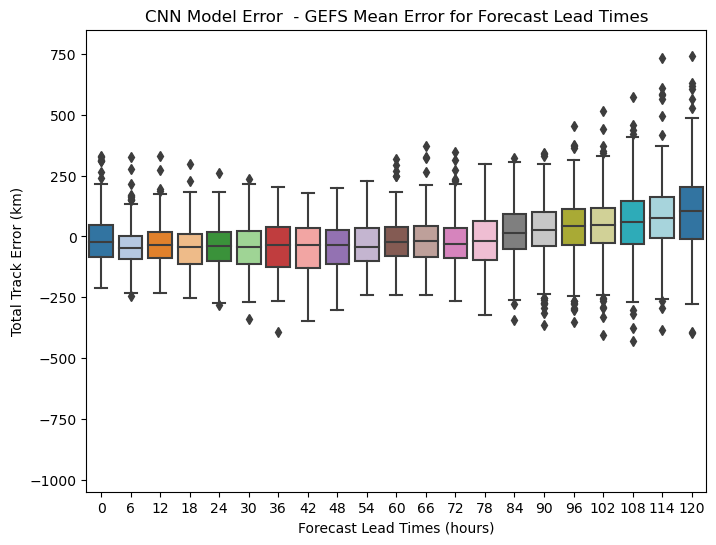

In [40]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# You can customize the appearance of the plot using Seaborn's options
custom_palette = sns.color_palette('tab20', 21)
sns.boxplot(data=_df, palette=custom_palette)  # 'palette' controls the color palette

# Set labels and title
plt.xlabel('Forecast Lead Times (hours)')
plt.ylabel('Total Track Error (km)')
plt.title('CNN Model Error  - GEFS Mean Error for Forecast Lead Times')

plt.ylim(-1050, 850)

# Display the plot
plt.show()

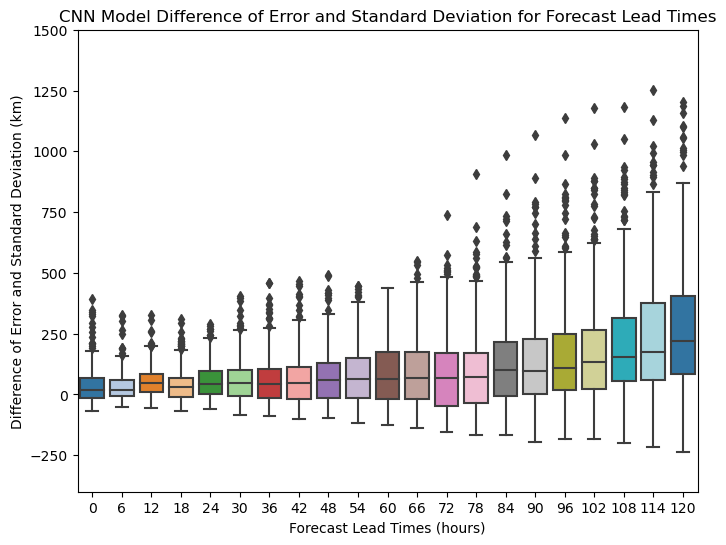

In [41]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# You can customize the appearance of the plot using Seaborn's options
custom_palette = sns.color_palette('tab20', 21)
sns.boxplot(data=df_mod_dist_std, palette=custom_palette)  # 'palette' controls the color palette

# Set labels and title
plt.xlabel('Forecast Lead Times (hours)')
plt.ylabel('Difference of Error and Standard Deviation (km)')
plt.title('CNN Model Difference of Error and Standard Deviation for Forecast Lead Times')

plt.ylim(-400, 1500)

# Display the plot
plt.show()

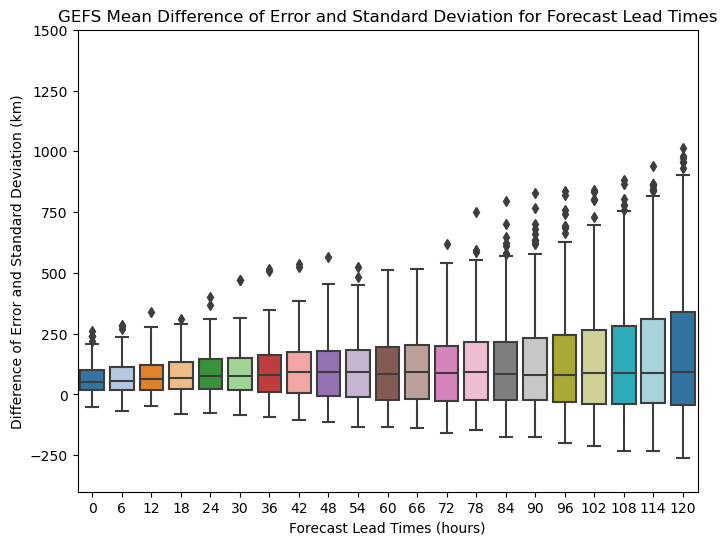

In [42]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))  # Set the figure size (optional)

# You can customize the appearance of the plot using Seaborn's options
custom_palette = sns.color_palette('tab20', 21)
sns.boxplot(data=df_ens_dist_std, palette=custom_palette)  # 'palette' controls the color palette

# Set labels and title
plt.xlabel('Forecast Lead Times (hours)')
plt.ylabel('Difference of Error and Standard Deviation (km)')
plt.title('GEFS Mean Difference of Error and Standard Deviation for Forecast Lead Times')

plt.ylim(-400, 1500)

# Display the plot
plt.show()

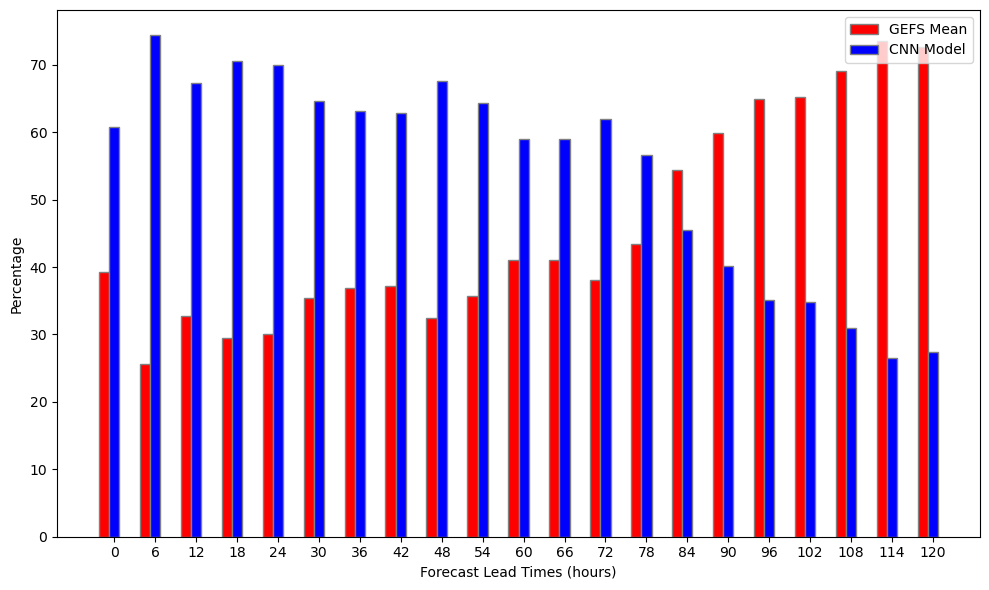

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

taus = []
for i in range (0, NUM_OF_INTERVALS):
    taus.append(i*6)

df_percent = pd.DataFrame(count).T
df_percent.columns = taus

percent_gefs = (df_percent == -1).mean() * 100
#percent_comparable = (df_percent == 0).mean() * 100
percent_cnnlstm = (df_percent == 1).mean() * 100

# Create the double bar graph using matplotlib
plt.figure(figsize=(10, 6))

# Bar positions
bar_width = 0.25
r1 = range(len(percent_gefs))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bars
plt.bar(r1, percent_gefs, color='r', width=bar_width, edgecolor='grey', label='GEFS Mean')
plt.bar(r2, percent_cnnlstm, color='b', width=bar_width, edgecolor='grey', label='CNN Model')
#plt.bar(r3, percent_comparable, color='g', width=bar_width, edgecolor='grey', label='Within 10% of each other')

# Add labels, title, and legend
plt.ylabel('Percentage')
plt.xlabel('Forecast Lead Times (hours)')
plt.xticks([r + bar_width for r in range(len(percent_gefs))], percent_gefs.index)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Display the graph
plt.tight_layout()
plt.show()

In [44]:
percent_gefs.mean()

45.62074829931973

In [45]:
percent_cnnlstm.mean()

54.37925170068028

In [46]:
# Count the number of True values in each row
df_percent['num_true'] = df_percent.apply(lambda row: row.sum(), axis=1)

# Find the row with the most True values
max_true_row = df_percent[df_percent['num_true'] >= df_percent['num_true'].max()]
min_true_row = df_percent[df_percent['num_true'] <= df_percent['num_true'].min()]

In [47]:
np.unique(np.array(count).flatten(), return_counts=True)

(array([-1,  1]), array([3219, 3837], dtype=int64))

In [51]:
improvement = []
for i in test.reset_index().index:
    improvement.append(Compare.compare_closeness(i, test, outputs, NUM_OF_INTERVALS, _print=False))
test['improvement'] = improvement
test1 = test.reset_index()

C:\Users\nagra\AppData\Local\Temp\ipykernel_12984\3266424434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['improvement'] = improvement


In [52]:
filtered_indices = test1.index[test1['improvement'] > 0.45].tolist()
filtered_indices

[4, 6, 7, 9, 10, 11, 142]

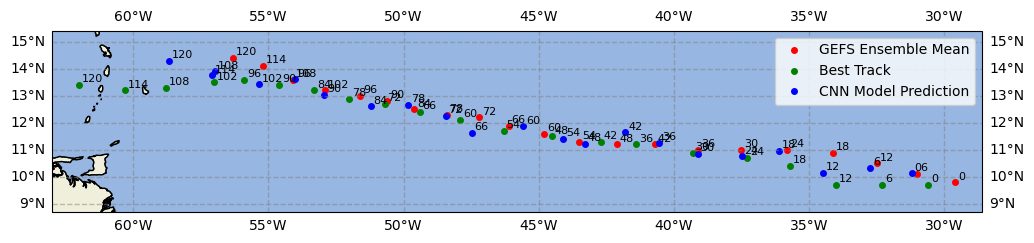

Correlation between mod_ATE and mod_TTE: -0.933772927571769
Correlation between mod_CTE and mod_TTE: 0.31091843052774987
Correlation between ens_ATE and ens_TTE: -0.993420661768794
Correlation between ens_CTE and ens_TTE: 0.0612347317120438


C:\Users\nagra\Compare.py:201: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_selected = df_selected.append(new_row_df)
C:\Users\nagra\Compare.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row[-6:-2] *= -1


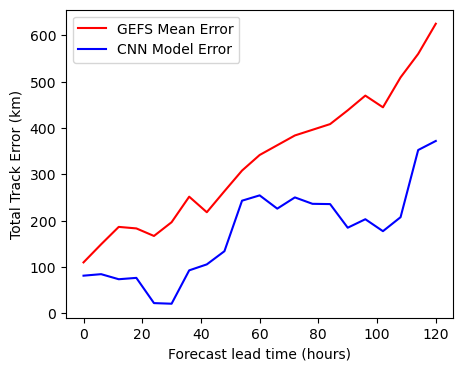

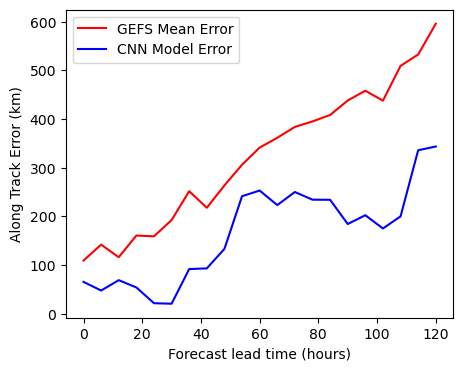

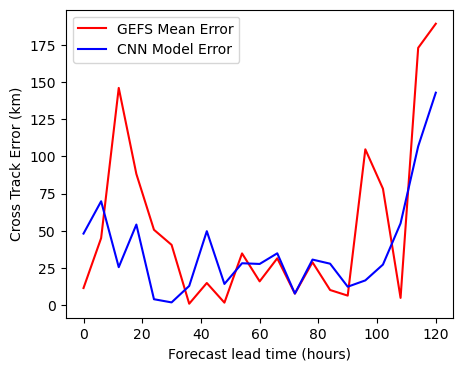

Mean Track RMSE: 2.355035132687084
Model 1 Track RMSE: 1.2922985968039877
Storm Date: (Timestamp('2023-06-18 06:00:00'), '03')
Improvement: 0.4512614360323869


0.4512614360323869

In [61]:
start_num = filtered_indices[0]
b = Compare.create_dataframe(start_num, test, outputs, NUM_OF_INTERVALS)
Compare.plot_compare(b, extent=1, position = "upper right")
Compare.error_graph(b, fig_size=(5, 4))
Compare.compare_closeness(start_num, test, outputs, NUM_OF_INTERVALS, _print = True)

In [ ]:
for hour in range(66, 126, 6):
    print("\n hour " + str(hour) + ":")
    i = int(hour/6)
    a = full_matrix.iloc[df_ens_dists[df_ens_dists.iloc[:, i] * 3 < df_mod_dists.iloc[:, i]].iloc[:, i].index]
    c = ((120-hour)/6 + 1) * (-2)
    a = a.iloc[:, [c-42-21-i-21, c-42-21-i, c-42, c-42+1, c, c+1]]

    a.columns = ['mlat', 'mlon', 'blat', 'blon', 'plat', 'plon']
    a = a.reset_index()
    a = a.drop("basin", axis = 1)
    a.set_index(["date", "CY"], inplace=True)

    Compare.plot_compare(a, extent=3, position = "upper left")